Lasso Regression model is build on top of linear regression model and it is optimized using regularization (L1)

In [78]:
import numpy as np

Model Class Building 

In [79]:
class LassoRegression:

    def __init__(self,learning_rate,no_of_iter,lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iter = no_of_iter 
        self.lambda_parameter = lambda_parameter


    def fit(self,X,Y):
        # no. of training data = m and no. of features = n
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.no_of_iter):
            self.updateWeights()


    def updateWeights(self):
        Y_pred = self.predict(self.X)
        dw = np.zeros(self.n)

        for i in range(self.n):

            if self.w[i]>0:
                dw[i] = (-(2*self.X[:,i]).dot(self.Y - Y_pred)) + self.lambda_parameter

            else:
                dw[i] = (-(2*self.X[:,i]).dot(self.Y- Y_pred)) - self.lambda_parameter

        db = 2* np.sum(self.Y - Y_pred) / self.m

        #updating the weight and bias 
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db


    def predict(self,X):

        return X.dot(self.w) + self.b


# Model class Implementation 

Data Collection and Analysis

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error , r2_score
import matplotlib.pyplot as plt


In [81]:
data = pd.read_csv('salary_data.csv')

In [82]:
data.head(8)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445


In [83]:
data.shape

(30, 2)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [85]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [86]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [87]:
X = data.iloc[:,[0]].values
Y = data.iloc[:,1].values

In [88]:
print(X)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [89]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


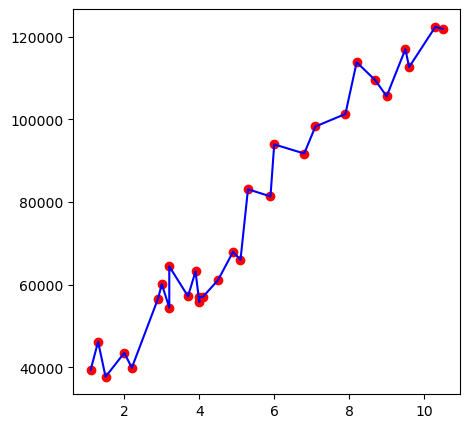

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y,c='red')
plt.plot(X,Y,c='blue')

Splitting of data into Training and Test data 

In [91]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33 , random_state =0)

In [92]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(30, 1) (20, 1) (10, 1)
(30,) (20,) (10,)


Model Training 

In [93]:
model = LassoRegression(learning_rate=0.001,no_of_iter=1000,lambda_parameter=0.01)
model.fit(X_train,Y_train)

Model Prediction and Performance analysis 

For the Training Data : 

In [94]:
Y_train_pred = model.predict(X_train)
train_accuracy = mean_absolute_error(Y_train,Y_train_pred)
train_accuracy1 = r2_score(Y_train_pred,Y_train)

In [95]:
print(f'The Mean Absolute error for the Training data is {train_accuracy}\nThe R2 score Metrics of the Training data is {train_accuracy1}')

The Mean Absolute error for the Training data is 16409.199716705618
The R2 score Metrics of the Training data is 0.7456842477400518


For the Test data : 

In [96]:
Y_test_pred = model.predict(X_test)
test_data_accuracy = mean_absolute_error(Y_test,Y_test_pred)
test_data_accuracy1 = r2_score(Y_test_pred,Y_test)

In [97]:
print(f'The Mean Absolute Error for the Test Data is {test_data_accuracy}\nThe R2 score Metrics of the Test data is {test_data_accuracy1}')

The Mean Absolute Error for the Test Data is 17630.706733376977
The R2 score Metrics of the Test data is 0.8283618948644076


Visualization

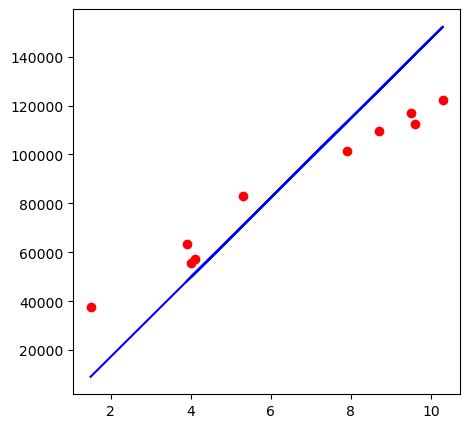

In [98]:
plt.figure(figsize=(5,5))
plt.scatter(X_test,Y_test,c='red')
plt.plot(X_test,Y_test_pred,c='blue')